# Linear Regression 

Author : Hrithik Shukla
Email ID : shuklahrithik3003@gmail.com

In [3]:
#Improting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Uploading Data sets
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head() #chekcing if the data was uploaded successfully

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Checking some basic information about the dataset
print(df.dtypes)
print(df.shape)
print(df.describe(include="all"))

Hours     float64
Scores      int64
dtype: object
(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


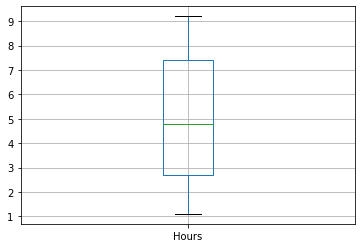

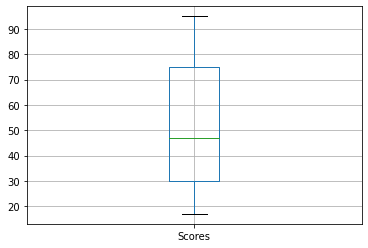

In [6]:
#Assumption : Checking Outliers 
for i  in df.columns:
    df.boxplot(column=i)
    plt.show()

"""
Our data is not affected by outliers 
"""

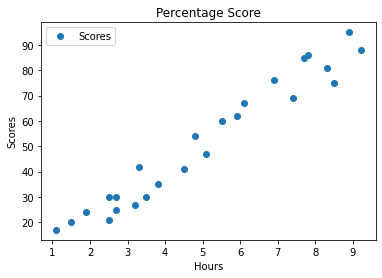

In [12]:
#Assumption : linearity
df.plot(x="Hours",y="Scores",style='o')

plt.title("Percentage Score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Graph intreperets that there is a strong positive linear relationsip between
Hours of study and Scores.

In [26]:
#Preparing the data 
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [40]:
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#train the model 
lm.fit(X_train,Y_train)


LinearRegression()

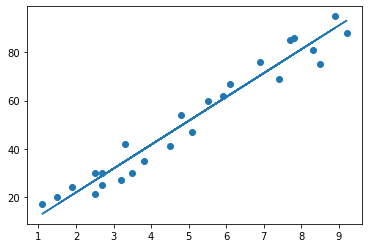

In [32]:
#Regressor Line
l = lm.coef_*X + lm.intercept_

#Plotting for the test data 
plt.scatter(X,Y)
plt.plot(X,l)
plt.show()

In [34]:
#Prediction
print(X_test)
y_pred = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
#Actual VS Predicted
pred = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
#Evaluating The model
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9454906892105356
RMSE: 4.6474476121003665
Adj R-square: 0.943120719176211


In [48]:
#What will  happen if the student studies for 9.5 hours per day?
hr = pd.DataFrame({"hour":[9.25]})
print(hr.shape)


(1, 1)


In [51]:
#Predicting values on the sample data 
print("Number of hours: ",9.5)
print("Predicted Score: ",lm.predict(hr))

Number of hours:  9.5
Predicted Score:  [93.69173249]
